# 한국 기사 카테고리 분류를 합니다.

In [1]:
import os, json, glob, sys, numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, Bidirectional, GlobalMaxPool1D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend.tensorflow_backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

C:\Users\leesoojin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


이 데이터는 이미 전처리가 되어 있는 상태입니다.

즉 형태소 분석이 완료되어 있는 상태입니다.


In [2]:
root_dir = './dataset/신문기사자료'
categories = ['100', '101', '102', '103', '104', '105']
nb_classes = len(categories)

X = []
y = []

In [3]:
for c_idx, cat in enumerate(categories):
    dir_detail = root_dir + "/" + cat
    files = glob.glob(dir_detail+"/*.txt.*")
    
    for i, fname in enumerate(files):
        with open(fname, "r", encoding='utf-8') as f:
            for idx, content in enumerate(f):
                X.append(content)
                y.append(c_idx)
        if i % 900 == 0:
            print(cat, " : ", fname)
            
            
print(len(X))

100  :  ./dataset/신문기사자료/100\1.txt.wakati
100  :  ./dataset/신문기사자료/100\1809.txt.wakati
100  :  ./dataset/신문기사자료/100\2619.txt.wakati
100  :  ./dataset/신문기사자료/100\3429.txt.wakati
100  :  ./dataset/신문기사자료/100\648.txt.wakati
101  :  ./dataset/신문기사자료/101\1.txt.wakati
101  :  ./dataset/신문기사자료/101\1809.txt.wakati
101  :  ./dataset/신문기사자료/101\2619.txt.wakati
101  :  ./dataset/신문기사자료/101\345.txt.wakati
102  :  ./dataset/신문기사자료/102\1.txt.wakati
102  :  ./dataset/신문기사자료/102\1809.txt.wakati
102  :  ./dataset/신문기사자료/102\664.txt.wakati
103  :  ./dataset/신문기사자료/103\1.txt.wakati
103  :  ./dataset/신문기사자료/103\1809.txt.wakati
103  :  ./dataset/신문기사자료/103\2619.txt.wakati
103  :  ./dataset/신문기사자료/103\871.txt.wakati
104  :  ./dataset/신문기사자료/104\1.txt.wakati
104  :  ./dataset/신문기사자료/104\1809.txt.wakati
104  :  ./dataset/신문기사자료/104\2619.txt.wakati
104  :  ./dataset/신문기사자료/104\3429.txt.wakati
105  :  ./dataset/신문기사자료/105\1.txt.wakati
105  :  ./dataset/신문기사자료/105\1809.txt.wakati
105  :  ./dataset/신문기사자료/105\854

총 데이터 셋은 17833개입니다.

하나가 하나의 기사라고 생각하시면 됩니다.



In [4]:
print(X[0])

대다 대선 후보 역대 최 명 등록 오다 월 일 실시 되다 대다 대통령 선거 역대 가장 많다 명 대선 후보 등록 하다 중앙 선거 관리 위원회 일 후보 등록 마감 결과 더불다 민주당 문재인 국민의당 안철수 자유 한국 홍준표 바르다 정당 유승민 정의당 심상정 후보 등 주요 개 정당 후보 비롯 하다 명 등록 하다 밝히다 개 정당 후보 모두 후보 등록 첫날 일 서류 접수 하다 안 후보 유 후보 직접 선관위 청사 방문 하다 접수 하다 재산 납세 병역 등 신상 정보 제출 현황 보다 안 후보 억 만원 재산 가장 많다 이다 유 후보 억 만원 홍 후보 억 만원 문 후보 억 만원 심 후보 억 만원 순 이다 또 군소 주자 가운데 새누리당 조원진 늘 푸른 한국 이재오 민중 연합 김선동 국민대 통합 장성민 한국 국민당 이경희 홍익 윤홍식 한반도 미래연합 김정선 무소속 김민찬 후보 등록 하다 일 통일한국 남재준 경제 애국 오 영국 후보 추가 등록 하다 이다 역대 대선 사상 많다 숫자 종전 각각 명 후보 나서다 년 대다 대선 년 대다 대선 최대 규모 이다 투표 용지 길이 역대 대선 통틀어 가장 길어지다 전망 선거 투표 용지 ㎝ 달 공직선거법 대선 후보 기탁금 억원 받다 최종 득표율 이상 기록 하다 전액 ∼ 를 기록 하다 반액 보전 해주다 정당 추천 후보자 일 약 억원 선거 보조금 배분 되다 강준구 기자 국민일보 홈페이지 페이스북 트위터 취재 대행 소 왱 클릭 GoodNews paper 국민일보 무단 전재 및 재 배포 금지 



In [5]:
y = np_utils.to_categorical(y, nb_classes)
print(y)


[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


많이 나온 5000개의 단어를 사용하고 최대 길이는 300으로 맞춥니다.

In [6]:
max_word = 5000
max_len = 300

tok = Tokenizer(num_words = max_word)
tok.fit_on_texts(X)

In [7]:
sequences = tok.texts_to_sequences(X)
print(len(sequences[0]))
print(sequences[0])

210
[65, 31, 7, 1228, 561, 43, 933, 76, 17, 5, 763, 3, 65, 19, 220, 1228, 111, 78, 43, 31, 7, 933, 1, 278, 220, 300, 194, 5, 7, 933, 1784, 115, 252, 114, 88, 132, 99, 270, 27, 327, 324, 199, 440, 1242, 1082, 7, 6, 373, 85, 199, 7, 590, 1, 43, 933, 1, 42, 85, 199, 7, 177, 7, 933, 3007, 5, 2476, 1951, 1, 29, 7, 340, 7, 322, 2115, 2443, 315, 1, 1951, 1, 1634, 4815, 6, 156, 1041, 2763, 33, 29, 7, 104, 142, 1634, 111, 78, 11, 340, 7, 104, 142, 341, 7, 104, 142, 70, 7, 104, 142, 915, 7, 104, 142, 873, 11, 86, 957, 230, 1991, 3667, 1262, 4906, 27, 1162, 516, 27, 316, 3047, 7, 933, 1, 5, 69, 1322, 441, 7, 234, 933, 1, 11, 1228, 31, 1192, 78, 2890, 506, 43, 7, 233, 9, 65, 31, 9, 65, 31, 272, 279, 11, 436, 1454, 1228, 31, 111, 191, 220, 436, 2878, 138, 4534, 31, 7, 79, 26, 754, 2073, 119, 218, 1, 3983, 493, 52, 218, 1, 3713, 885, 199, 1380, 1338, 5, 195, 79, 220, 2503, 3, 12, 2406, 874, 100, 276, 736, 893, 977, 4586, 147, 4608, 4488, 2406, 37, 40, 35, 24, 36, 30]


In [8]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
print(sequences_matrix)
print(sequences_matrix[0])
print(len(sequences_matrix[0]))

[[   0    0    0 ...   24   36   30]
 [  60    5   31 ...   24   36   30]
 [   0    0    0 ...   40   36   30]
 ...
 [   0    0    0 ...   24   36   30]
 [ 758  492  126 ...   24   36   30]
 [ 156  169 2144 ...   24   36   30]]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   65   31    7 1228  561   43  933   76
   17    5  763    3   65   19  220 1228  111   78   43   31    7  933
    1  278  220  300  194    5    7  933 1784  115  252  114   88  132
   99  270   27  327  324  199  440 1242 1082    7    6  373   85  199
    7  590    1   43  933    1   42   85  199    7  177    7  

이렇게 길이를 300으로 맞추고 가장 많이 사용하는 단어 5천개를 기준으로 했습니다.

그리고 문자 -> 숫자로 바꿔주었구요.

In [14]:
print(len(tok.word_index))

X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

76106
(14266, 300)
(14266, 6)


총 단어는 76106개입니다.

이제 모델을 만들고 훈련시켜봅니다.

In [15]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    
    model.add(Embedding(max_word, 64, input_length=max_len))
    model.add(LSTM(60, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    model_path = model_dir + "/predict_korea_news_LSTM.model"
    checkpoint = ModelCheckpoint(filepath=model_path, monitor="val_loss", verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=7)
    

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 64)           320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 300, 60)           30000     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 306       
Total para

In [17]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Train on 11412 samples, validate on 2854 samples
Epoch 1/20
11412/11412 [==============================] - 42s 4ms/step - loss: 1.6138 - acc: 0.3313 - val_loss: 1.2848 - val_acc: 0.5060

Epoch 00001: val_loss improved from inf to 1.28482, saving model to ./model/predict_korea_news_LSTM.model
Epoch 2/20
11412/11412 [==============================] - 41s 4ms/step - loss: 0.9763 - acc: 0.6611 - val_loss: 0.5960 - val_acc: 0.8273

Epoch 00002: val_loss improved from 1.28482 to 0.59604, saving model to ./model/predict_korea_news_LSTM.model
Epoch 3/20
11412/11412 [==============================] - 41s 4ms/step - loss: 0.5507 - acc: 0.8315 - val_loss: 0.4738 - val_acc: 0.8574

Epoch 00003: val_loss improved from 0.59604 to 0.47383, saving model to ./model/predict_korea_news_LSTM.model
Epoch 4/20
11412/11412 [==============================] - 41s 4ms/step - loss: 0.3812 - acc: 0.8912 - val_loss: 0.4696 - val_acc: 0.8662

Epoch 00004: val_loss improved from 0.47383 to 0.46962, saving model to .

In [19]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

3567/3567 [==============================] - 18s 5ms/step
정확도 : 0.8618


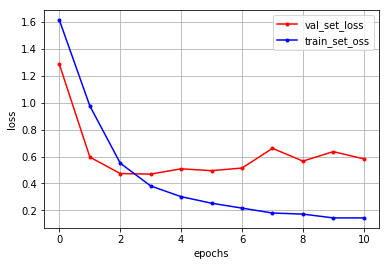

In [20]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

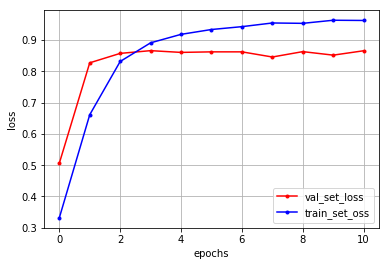

In [21]:
y_vloss = hist.history['val_acc']
y_loss = hist.history['acc']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

이렇게 됩니다!